In [1]:
import numpy as np 
import pandas as pd

In [8]:
import os
for dirname, _, filenames in os.walk("C:\solar images\mini project"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\solar images\mini project\Clean\Clean (1).jpeg
C:\solar images\mini project\Clean\Clean (10).JPG
C:\solar images\mini project\Clean\Clean (100).jpg
C:\solar images\mini project\Clean\Clean (101).jpg
C:\solar images\mini project\Clean\Clean (102).jpg
C:\solar images\mini project\Clean\Clean (103).jpg
C:\solar images\mini project\Clean\Clean (104).jpg
C:\solar images\mini project\Clean\Clean (105).jpg
C:\solar images\mini project\Clean\Clean (106).jpg
C:\solar images\mini project\Clean\Clean (107).jpg
C:\solar images\mini project\Clean\Clean (108).jpg
C:\solar images\mini project\Clean\Clean (109).jpg
C:\solar images\mini project\Clean\Clean (11).jpg
C:\solar images\mini project\Clean\Clean (110).jpg
C:\solar images\mini project\Clean\Clean (111).jpg
C:\solar images\mini project\Clean\Clean (112).jpg
C:\solar images\mini project\Clean\Clean (113).jpg
C:\solar images\mini project\Clean\Clean (114).jpg
C:\solar images\mini project\Clean\Clean (115).jpg
C:\solar images\mini project\Clean

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import random
from cv2 import resize
from glob import glob

import warnings
warnings.filterwarnings("ignore")

In [5]:
import tensorflow as tf
loss = tf.compat.v1.losses.sparse_softmax_cross_entropy

In [9]:
img_height = 244
img_width = 244
train_ds = tf.keras.utils.image_dataset_from_directory(
  'C:\solar images\mini project',
  validation_split=0.2,
  subset='training',
  image_size=(img_height, img_width),
  batch_size=32,
  seed=42,
  shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory(
  'C:\solar images\mini project',
  validation_split=0.2,
  subset='validation',
  image_size=(img_height, img_width),
  batch_size=32,
  seed=42,
  shuffle=True)

Found 262 files belonging to 2 classes.
Using 210 files for training.
Found 262 files belonging to 2 classes.
Using 52 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Clean', 'Physical-Damage']


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

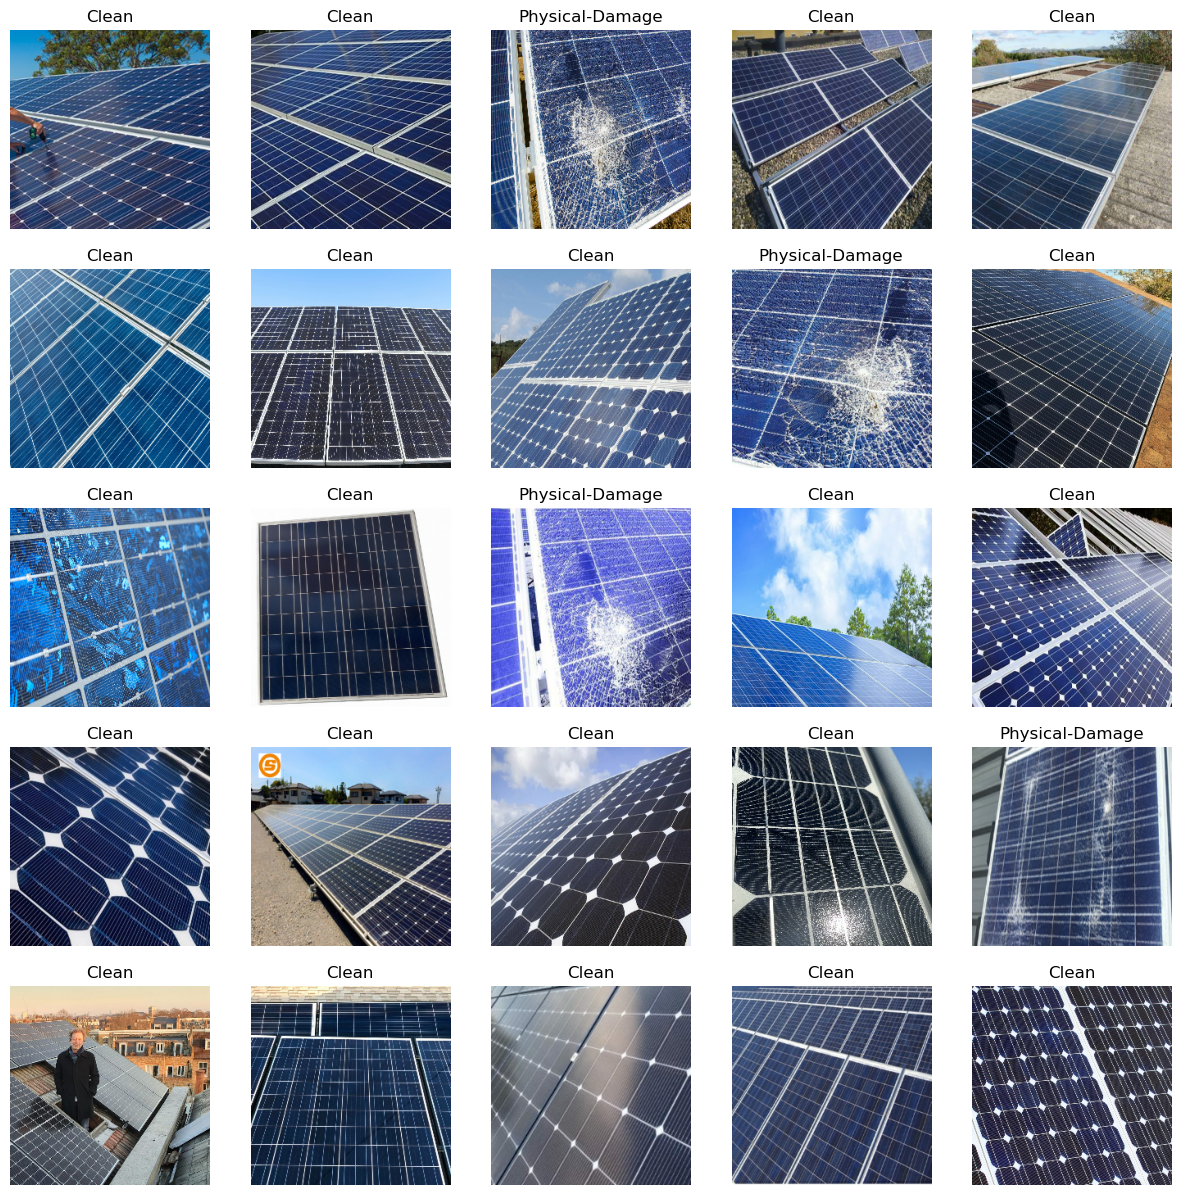

In [11]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [14]:
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False

In [15]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = tf.keras.applications.vgg16.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(90)(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 244, 244, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 244, 244, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                             

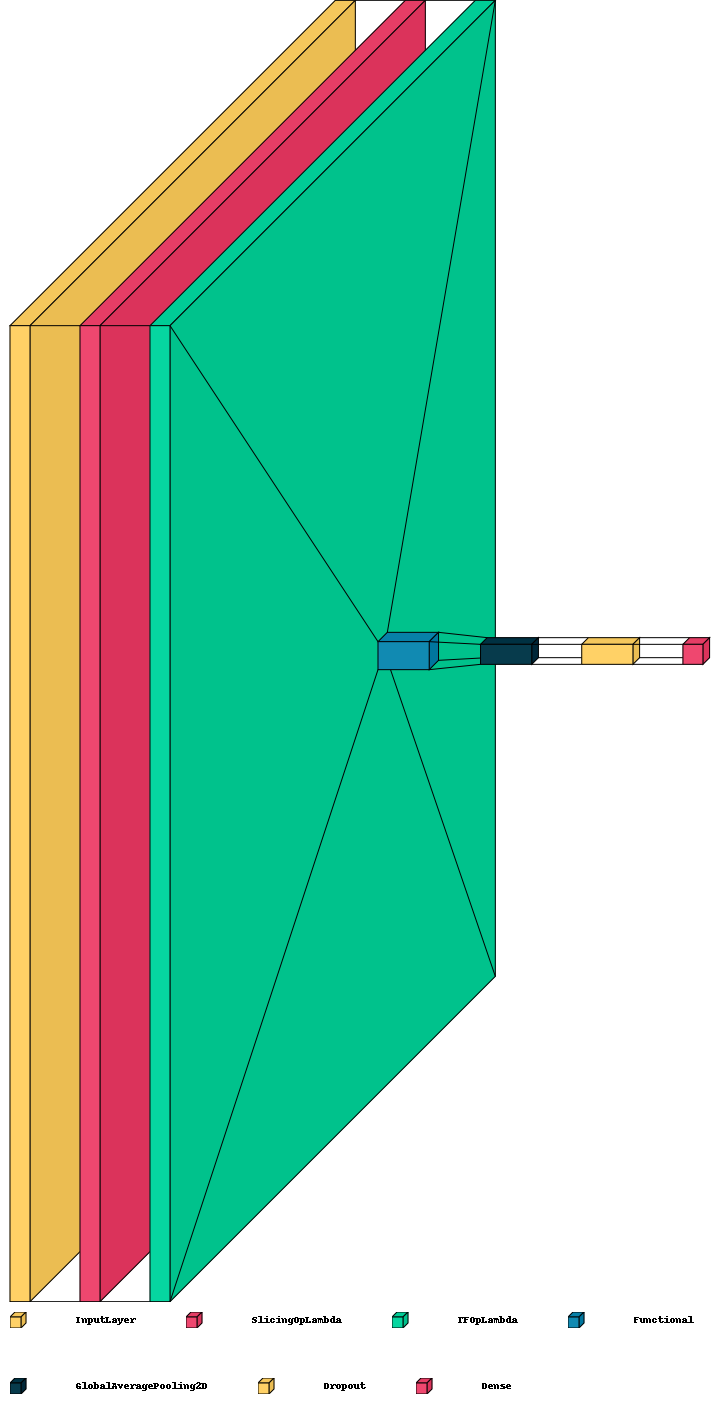

In [17]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model,legend=True,spacing=50,background_fill = 'white')

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
epoch = 15
model.fit(train_ds, validation_data=val_ds, epochs=epoch,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=1e-2,
            patience=3,
            verbose=1,
            restore_best_weights=True
        )
    ]
)

Epoch 1/15


7/7 [==============================] - 56s 7s/step - loss: 12.1201 - accuracy: 0.0333 - val_loss: 5.5335 - val_accuracy: 0.2115
Epoch 2/15
7/7 [==============================] - 45s 6s/step - loss: 5.3874 - accuracy: 0.3190 - val_loss: 3.0043 - val_accuracy: 0.6346
Epoch 3/15
7/7 [==============================] - 48s 7s/step - loss: 2.9239 - accuracy: 0.6095 - val_loss: 2.3400 - val_accuracy: 0.5577
Epoch 4/15
7/7 [==============================] - 48s 7s/step - loss: 2.0310 - accuracy: 0.6952 - val_loss: 1.8113 - val_accuracy: 0.5769
Epoch 5/15
7/7 [==============================] - 48s 7s/step - loss: 2.0494 - accuracy: 0.6333 - val_loss: 1.4779 - val_accuracy: 0.6346
Epoch 6/15
7/7 [==============================] - 44s 6s/step - loss: 1.6123 - accuracy: 0.6857 - val_loss: 1.1542 - val_accuracy: 0.6923
Epoch 7/15
7/7 [==============================] - 49s 7s/step - loss: 1.4624 - accuracy: 0.6762 - val_loss: 0.9925 - val_accuracy: 0.7115
Epoch 8/15
7/7 [===============

In [20]:
base_model.trainable = True
for layer in base_model.layers[:14]:
    layer.trainable = False
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 244, 244, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 244, 244, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                             

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
epoch = 15
history = model.fit(train_ds, validation_data=val_ds, epochs=epoch,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=1e-2,
            patience=3,
            verbose=1,
        )
    ]
)

Epoch 1/15
7/7 [==============================] - 57s 7s/step - loss: 0.9132 - accuracy: 0.8238 - val_loss: 0.1894 - val_accuracy: 0.9423
Epoch 2/15
7/7 [==============================] - 54s 8s/step - loss: 0.1587 - accuracy: 0.9429 - val_loss: 0.1432 - val_accuracy: 0.9038
Epoch 3/15
7/7 [==============================] - 57s 8s/step - loss: 0.0718 - accuracy: 0.9857 - val_loss: 0.1148 - val_accuracy: 0.9615
Epoch 4/15
7/7 [==============================] - 57s 8s/step - loss: 0.0815 - accuracy: 0.9762 - val_loss: 0.3217 - val_accuracy: 0.9038
Epoch 5/15
7/7 [==============================] - 56s 8s/step - loss: 0.0652 - accuracy: 0.9857 - val_loss: 0.0531 - val_accuracy: 0.9615
Epoch 6/15
7/7 [==============================] - 57s 8s/step - loss: 0.0431 - accuracy: 0.9952 - val_loss: 0.0316 - val_accuracy: 0.9808
Epoch 7/15
7/7 [==============================] - 55s 7s/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0391 - val_accuracy: 0.9808
Epoch 8/15
7/7 [==================

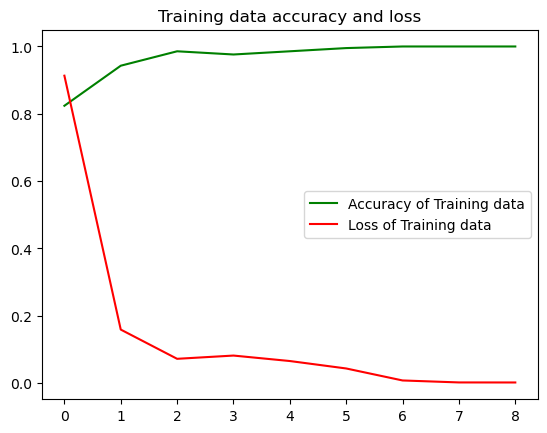

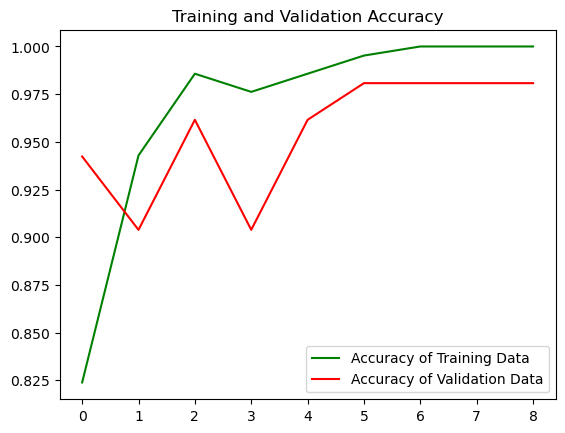

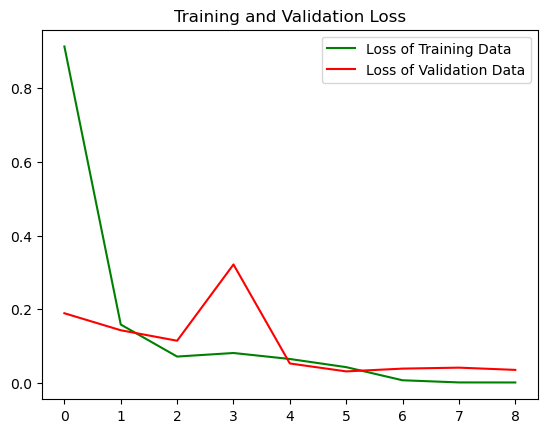

<Figure size 640x480 with 0 Axes>

In [23]:
get_ac = history.history['accuracy']
get_los = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()


In [24]:
model.save('solar_panel_inspection.hdf5')

1/1 [==============================] - 0s 203ms/step


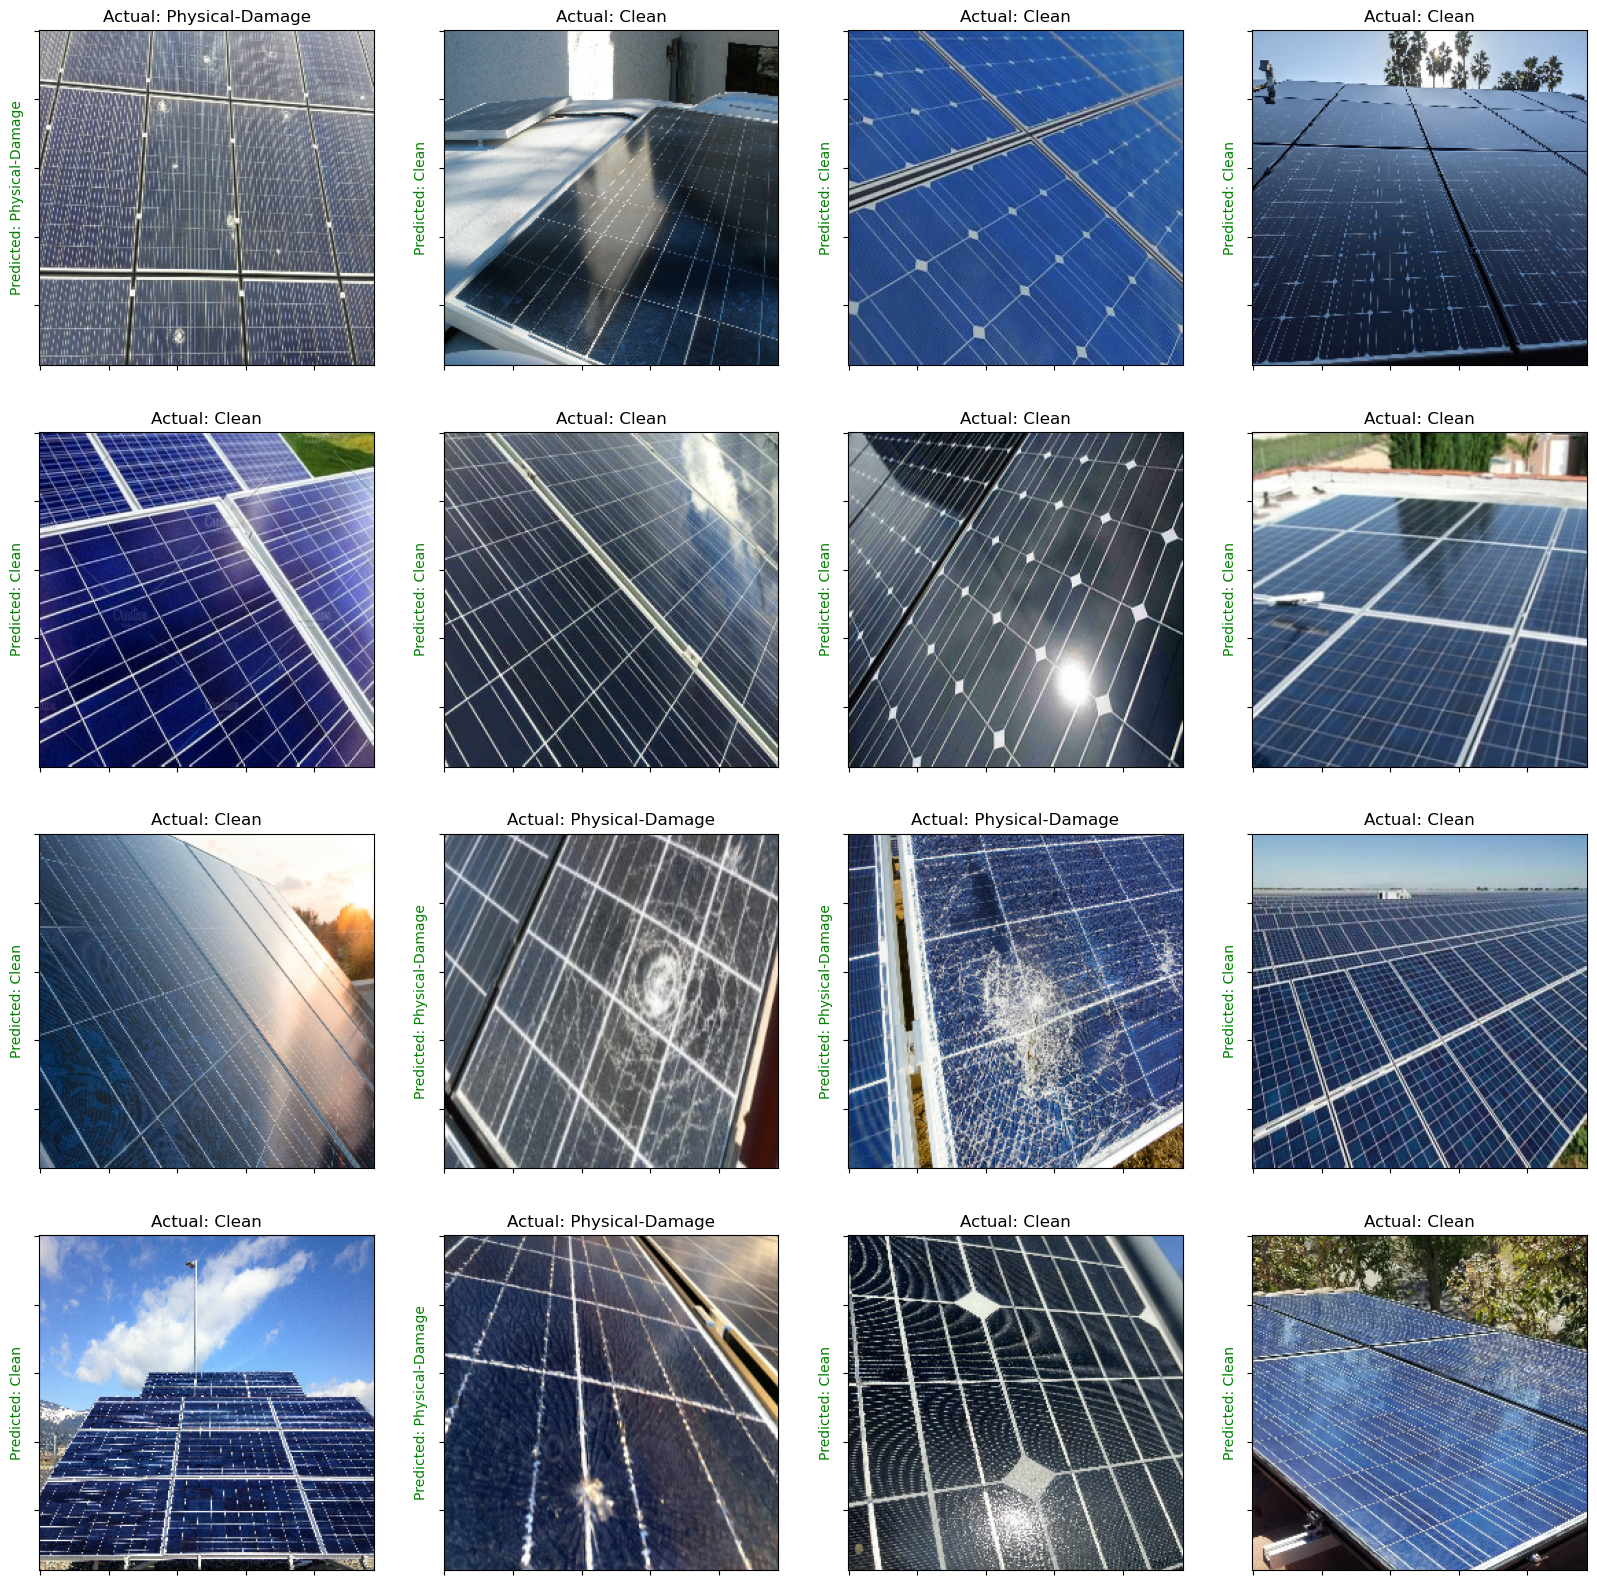

In [25]:
loss, accuracy = model.evaluate(val_ds)

plt.figure(figsize=(20, 20))
for images, labels in val_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])